# Color Extraction and Image Segmentation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

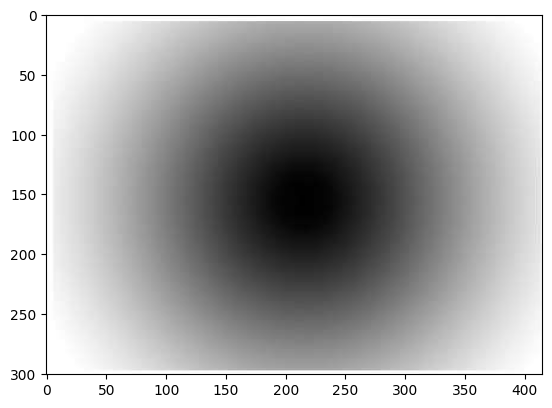

(124915, 3)


In [2]:
im = cv2.imread("test.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(im)
plt.show()
reshaped_im = im.reshape((-1, 3))
print(reshaped_im.shape)

In [3]:
k = 8
kmeans = KMeans(k)

In [4]:
kmeans.fit(reshaped_im)

KMeans()

In [5]:
dominant_colors = kmeans.cluster_centers_.astype('uint8')
dominant_colors

array([[130, 130, 130],
       [247, 247, 247],
       [ 63,  63,  63],
       [188, 188, 188],
       [ 23,  23,  23],
       [159, 159, 159],
       [218, 218, 218],
       [ 98,  98,  98]], dtype=uint8)

In [6]:
np.zeros_like(reshaped_im).shape

(124915, 3)

In [7]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

(301, 415, 3)


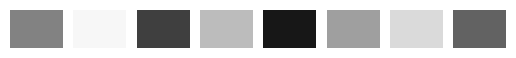

In [8]:
plt.figure()
for i,color in enumerate(dominant_colors):
    palette = np.zeros_like(im, dtype='uint8')
    palette[:,:,:] = color
    plt.subplot(1,k,i+1)
    plt.axis("off")
    plt.imshow(palette)
print(im.shape)    

In [9]:
new_img = np.zeros((im.shape[0]*im.shape[1],3),dtype='uint8')
print(new_img.shape)

(124915, 3)


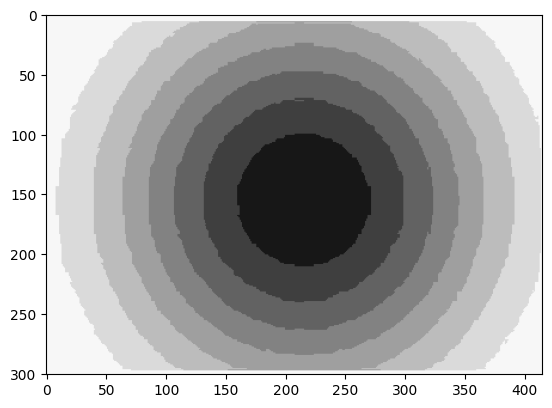

In [10]:
for ix in range(new_img.shape[0]):
    new_img[ix] = dominant_colors[kmeans.labels_[ix]]
    
new_img = new_img.reshape((im.shape))
plt.imshow(new_img)
plt.show()